<a href="https://colab.research.google.com/github/Tornadoee/Market-Basket-Model/blob/master/Market_Basket_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Let's start ! | Loading data 

In [1]:
!curl -o Data.xlsx http://archive.ics.uci.edu/ml/machine-learning-databases/00352/Online%20Retail.xlsx

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 22.6M  100 22.6M    0     0  17.9M      0  0:00:01  0:00:01 --:--:-- 17.9M


# Importation

In [0]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns


In [0]:
#load the dataset
df = pd.read_excel('/content/Data.xlsx')

# **Exploring Data**
**Let's discover our dataset !**


In [4]:
#check the head and the tail of our dataset
df.head(5)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [5]:
df.tail(5)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France
541908,581587,22138,BAKING SET 9 PIECE RETROSPOT,3,2011-12-09 12:50:00,4.95,12680.0,France


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
InvoiceNo      541909 non-null object
StockCode      541909 non-null object
Description    540455 non-null object
Quantity       541909 non-null int64
InvoiceDate    541909 non-null datetime64[ns]
UnitPrice      541909 non-null float64
CustomerID     406829 non-null float64
Country        541909 non-null object
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


In [7]:
# checking if there is any NULL values present in the data
df.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

**Our dataset is composed of 541909 rows and 8 columns. When going through the columns, we notice that we have some missing values in the "CustomerID" column, as it only has 406829 values. Also the column "Description" has missing values.**

*italicized text*## **About the dataset**

**This dataframe contains 8 variables that correspond to:** 

**InvoiceNo**: Invoice number. Nominal, a 6-digit integral number uniquely assigned to each transaction. If this code starts with letter 'c', it indicates a cancellation.

**StockCode**: Product (item) code. Nominal, a 5-digit integral number uniquely assigned to each distinct product.

**Description**: Product (item) name. Nominal.
**Quantity**: The quantities of each product (item) per transaction. Numeric.

**InvoiceDate**: Invoice Date and time. Numeric, the day and time when each transaction was generated.

**UnitPrice**: Unit price. Numeric, Product price per unit in sterling.

**CustomerID**: Customer number. Nominal, a 5-digit integral number uniquely assigned to each customer.

**Country**: Country name. Nominal, the name of the country where each customer resides.

In [8]:
#exploring the unique values of each attribute
print("Number of transactions: ", df['InvoiceNo'].nunique())
print("Number of products bought: ",df['StockCode'].nunique())
print("Number of customers:", df['CustomerID'].nunique() )
print("Percentage of customers NA: ", round(df['CustomerID'].isnull().sum() * 100 / len(df),2),"%" )
print('Number of countries: ',df['Country'].nunique())

Number of transactions:  25900
Number of products bought:  4070
Number of customers: 4372
Percentage of customers NA:  24.93 %
Number of countries:  38


**The number of NA customers is large. That would affect many points and impact the results.**

 ## Let's dive into the quantitative data !

In [9]:
df.describe()

,Quantity,UnitPrice,CustomerID
count,541909.000000,541909.000000,406829.000000
mean,9.552250,4.611114,15287.690570
std,218.081158,96.759853,1713.600303
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13953.000000
50%,3.000000,2.080000,15152.000000
75%,10.000000,4.130000,16791.000000
max,80995.000000,38970.000000,18287.000000


**First thing that we can notice is that the dataframe has some negative values (Quantity and UnitPrice attributes). We suppose that the negative values correspond to purchases that was cancelled by the customer.**

**Let's get the cancelled data and verify if our assumption is true or false.**

In [10]:
cancelled_purchases = df[df['InvoiceNo'].astype(str).str.contains('C')]
cancelled_purchases.head(5)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
141,C536379,D,Discount,-1,2010-12-01 09:41:00,27.50,14527.0,United Kingdom
154,C536383,35004C,SET OF 3 COLOURED FLYING DUCKS,-1,2010-12-01 09:49:00,4.65,15311.0,United Kingdom
235,C536391,22556,PLASTERS IN TIN CIRCUS PARADE,-12,2010-12-01 10:24:00,1.65,17548.0,United Kingdom
236,C536391,21984,PACK OF 12 PINK PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.29,17548.0,United Kingdom
237,C536391,21983,PACK OF 12 BLUE PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.29,17548.0,United Kingdom


In [11]:
cancelled_purchases.tail(5)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
540449,C581490,23144,ZINC T-LIGHT HOLDER STARS SMALL,-11,2011-12-09 09:57:00,0.83,14397.0,United Kingdom
541541,C581499,M,Manual,-1,2011-12-09 10:28:00,224.69,15498.0,United Kingdom
541715,C581568,21258,VICTORIAN SEWING BOX LARGE,-5,2011-12-09 11:57:00,10.95,15311.0,United Kingdom
541716,C581569,84978,HANGING HEART JAR T-LIGHT HOLDER,-1,2011-12-09 11:58:00,1.25,17315.0,United Kingdom
541717,C581569,20979,36 PENCILS TUBE RED RETROSPOT,-5,2011-12-09 11:58:00,1.25,17315.0,United Kingdom


**Let's verify the quantity -80995.**

In [12]:
cancelled_purchases[cancelled_purchases['Quantity']==-80995]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
540422,C581484,23843,"PAPER CRAFT , LITTLE BIRDIE",-80995,2011-12-09 09:27:00,2.08,16446.0,United Kingdom


In [13]:
print(' The total number of cancelled purchases is :',len(cancelled_purchases))

 The total number of cancelled purchases is : 9288


In [14]:
cancelled_purchases[cancelled_purchases['Quantity']>0]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country


**The cancelled_purchases dataframe doesn't contain any transaction in which the quantity is positive ! This confirms our assumption.**

 ## Orders Exploration

In [15]:
# get unique InvoiceNo number per customer
groupby_customers = pd.DataFrame(df.groupby('CustomerID')['InvoiceNo'].nunique())
groupby_customers.head()

,InvoiceNo
CustomerID,
12346.0,2
12347.0,7
12348.0,4
12349.0,1
12350.0,1


In [16]:
groupby_customers.describe()

,InvoiceNo
count,4372.000000
mean,5.075480
std,9.338754
min,1.000000
25%,1.000000
50%,3.000000
75%,5.000000
max,248.000000


**5 is the average number of products/orders bought by each customer. 75% of the customers buy 5 articles at least.**

In [17]:
# get unique InvoiceNo number per country
groupby_countries = pd.DataFrame(df.groupby('Country')['InvoiceNo'].nunique())
groupby_countries

,InvoiceNo
Country,
Australia,69
Austria,19
Bahrain,4
Belgium,119
Brazil,1
Canada,6
Channel Islands,33
Cyprus,20
Czech Republic,5


**Most of our orders are from UK (23494). Then cames Germany (603) and France (461).**

In [18]:
# checking how many quantity of products/orders have been sold online from each country

df['Quantity'].groupby(df['Country']).agg('sum')

Country
Australia                 83653
Austria                    4827
Bahrain                     260
Belgium                   23152
Brazil                      356
Canada                     2763
Channel Islands            9479
Cyprus                     6317
Czech Republic              592
Denmark                    8188
EIRE                     142637
European Community          497
Finland                   10666
France                   110480
Germany                  117448
Greece                     1556
Hong Kong                  4769
Iceland                    2458
Israel                     4353
Italy                      7999
Japan                     25218
Lebanon                     386
Lithuania                   652
Malta                       944
Netherlands              200128
Norway                    19247
Poland                     3653
Portugal                  16180
RSA                         352
Saudi Arabia                 75
Singapore                  5234


**As we see, UK is dominating the purchases in this dataset.**

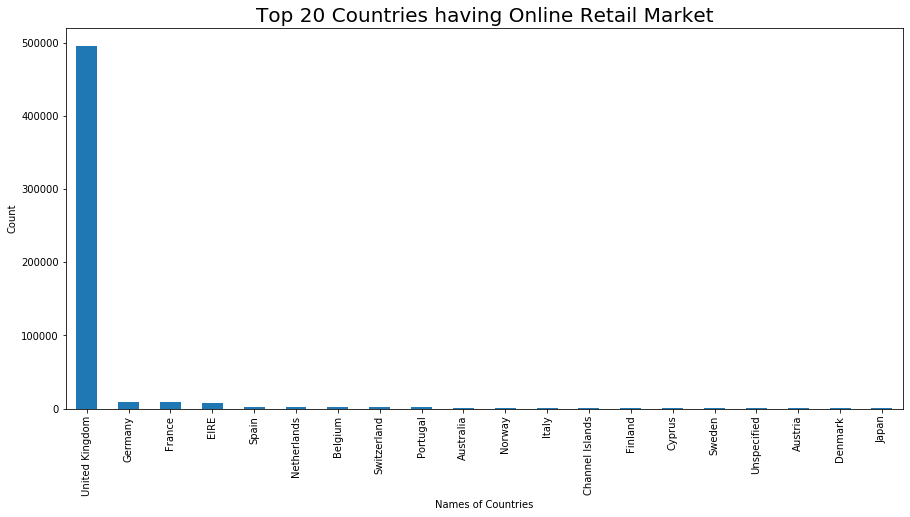

In [19]:
# checking the different values for country in the dataset

df['Country'].value_counts().head(20).plot.bar(figsize = (15, 7))
plt.title('Top 20 Countries having Online Retail Market', fontsize = 20)
plt.xlabel('Names of Countries')
plt.ylabel('Count')
plt.show()

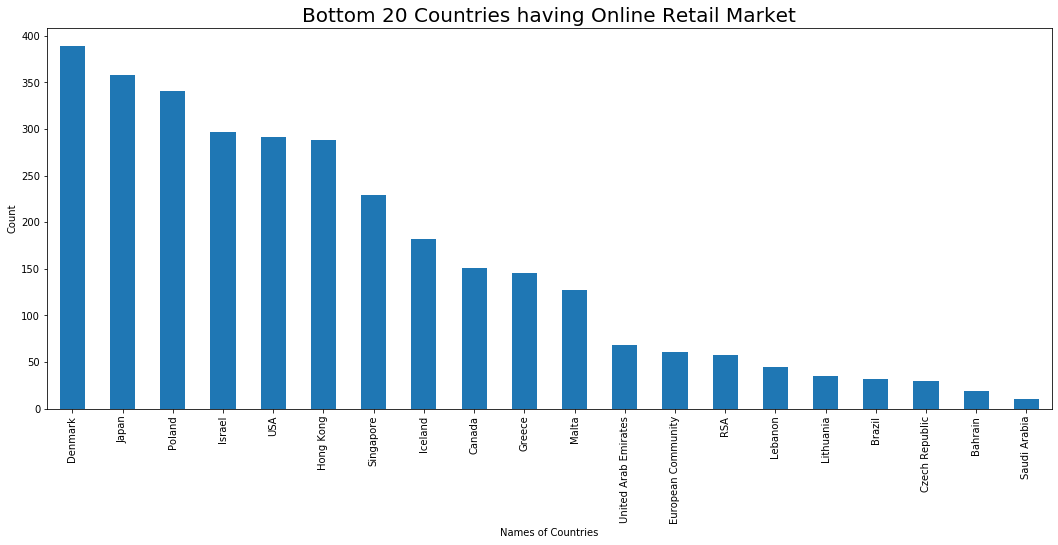

In [20]:
# checking the different values for country in the dataset

df['Country'].value_counts().tail(20).plot.bar(figsize = (18, 7))
plt.title('Bottom 20 Countries having Online Retail Market', fontsize = 20)
plt.xlabel('Names of Countries')
plt.ylabel('Count')
plt.show()

**And now, let's see the revenue of each country !**

In [0]:
df['total_cost'] = df['Quantity'] * df['UnitPrice']


In [22]:
df.head(5)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,total_cost
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34


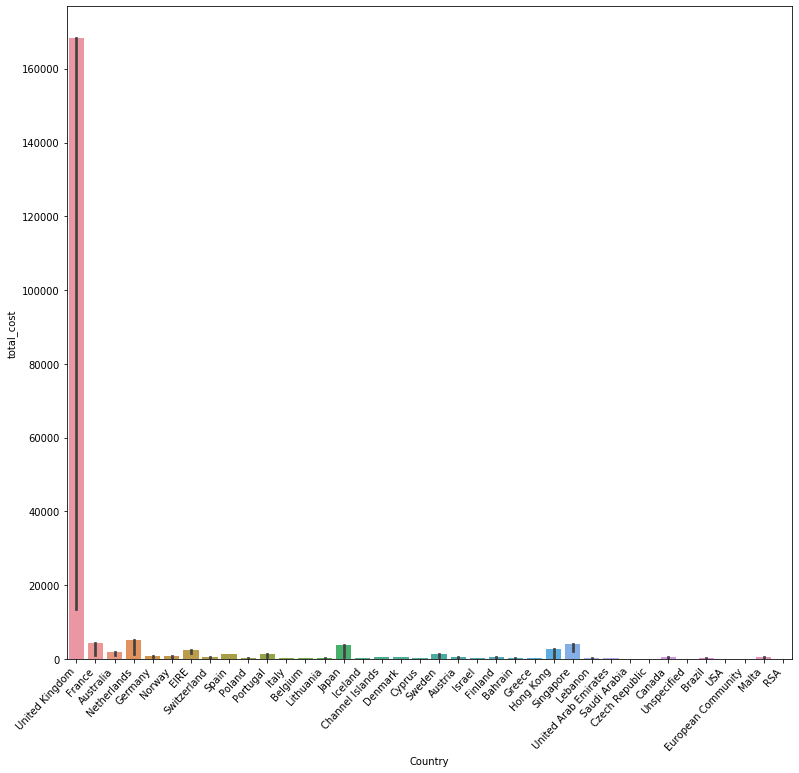

In [23]:
fig, ax = plt.subplots()
fig.set_size_inches(13, 12)
ax=sns.barplot(x='Country', y='total_cost',data=df,estimator=max,ax=ax)
ax.set_xticklabels(ax.get_xticklabels(), rotation=47, ha="right")
plt.show()

**Let's focus on UK retails**

In [24]:
retail_uk = df[df['Country']=='United Kingdom']
retail_uk.describe()

,Quantity,UnitPrice,CustomerID,total_cost
count,495478.000000,495478.000000,361878.000000,495478.000000
mean,8.605486,4.532422,15547.871368,16.525065
std,227.588756,99.315438,1594.402590,394.839116
min,-80995.000000,-11062.060000,12346.000000,-168469.600000
25%,1.000000,1.250000,14194.000000,3.290000
50%,3.000000,2.100000,15514.000000,8.290000
75%,10.000000,4.130000,16931.000000,16.630000
max,80995.000000,38970.000000,18287.000000,168469.600000


In [25]:
print("Number of transactions: ", retail_uk['InvoiceNo'].nunique())
print("Number of products bought: ",retail_uk['StockCode'].nunique())
print("Number of customers:", retail_uk['CustomerID'].nunique() )
print("Percentage of customers NA: ", round(retail_uk['CustomerID'].isnull().sum() * 100 / len(retail_uk),2),"%" )
print('Number of countries: ',retail_uk['Country'].nunique())

Number of transactions:  23494
Number of products bought:  4065
Number of customers: 3950
Percentage of customers NA:  26.96 %
Number of countries:  1


Text(0.5, 1.0, 'Time-Series plot for UK')

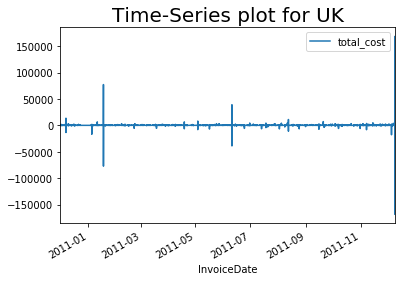

In [26]:
# defining a function to plot time-series plot for any country

def time_series(country):
  dataset = df[df['Country'] == country]
  dataset.plot(x = 'InvoiceDate', y = 'total_cost')
  
  
time_series('United Kingdom')
plt.title('Time-Series plot for UK', fontsize = 20)

**Let's have a look at the 'Description' Column.**

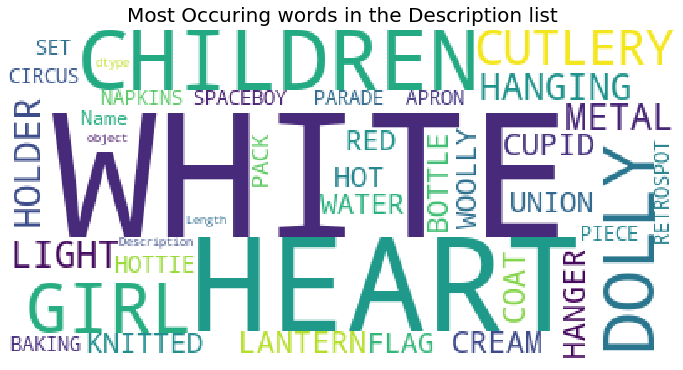

In [27]:
from wordcloud import WordCloud
from wordcloud import STOPWORDS

stopwords = set(STOPWORDS)
wordcloud = WordCloud(background_color = 'white').generate(str(df['Description']))

print(wordcloud)
plt.rcParams['figure.figsize'] = (12, 12)
plt.axis('off')
plt.imshow(wordcloud)
plt.title('Most Occuring words in the Description list', fontsize = 20)
plt.show()

**Let's see which products/orders are the most popular on stock**

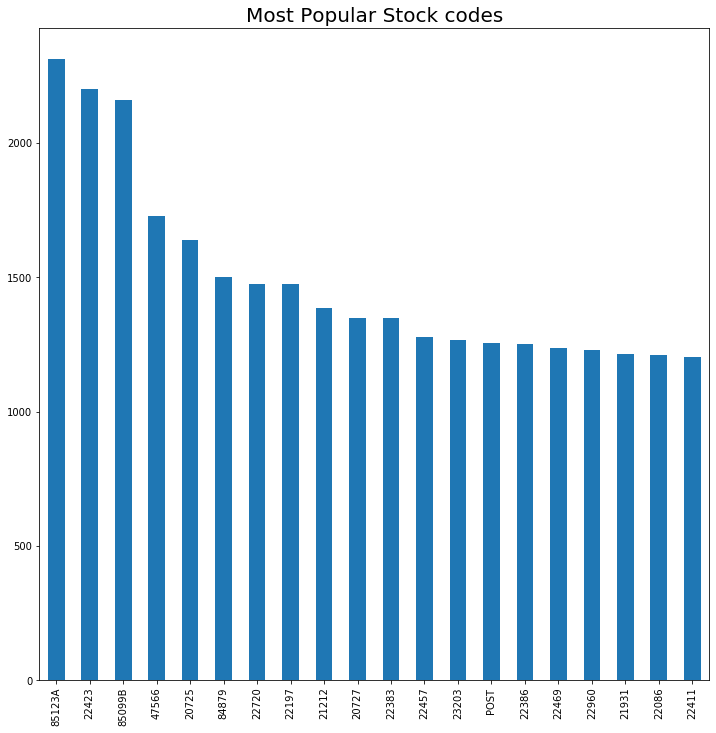

In [28]:
# looking the stockcode for the datset

df['StockCode'].value_counts().head(20).plot.bar()
plt.title('Most Popular Stock codes', fontsize = 20)
plt.show()

# **Market Basket Analysis**

**In this phase, we are going to use Apriori algorithm and the association rules in order to generate relations between products/orders and create our recommandation system.**

In [0]:
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules

 ## Cleanup Dataset

In [30]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,total_cost
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34


In [0]:
#remove additional spaces
df['Description'] = df['Description'].str.strip()
#remove NA values
df.dropna(axis=0, subset=['InvoiceNo'], inplace=True)
#remove cancelled orders
df['InvoiceNo'] = df['InvoiceNo'].astype('str')
df = df[~df['InvoiceNo'].str.contains('C')]

In [0]:
def encode_units(x):
    if x <= 0:
        return 0
    if x >= 1:
        return 1

def create_basket(country_filter):
    basket = (df[df['Country'] == country_filter]
          .groupby(['InvoiceNo', 'Description'])['Quantity']
          .sum().unstack().reset_index().fillna(0)
          .set_index('InvoiceNo'))
    return basket

After defining our functions, we are going to focus on 3 basics country : France, Germany, and UK.

## **Let's start with France !**

In [0]:
country_filter = "France"
basket_french = create_basket("France")
basket_sets = basket_french.applymap(encode_units)
basket_sets.drop('POSTAGE', inplace=True, axis=1)

In [0]:
frequent_itemsets = apriori(basket_sets, min_support=0.05, use_colnames=True)

In [41]:
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1.2)
rules.head()

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(ALARM CLOCK BAKELIKE GREEN),(ALARM CLOCK BAKELIKE PINK),0.096939,0.102041,0.073980,0.763158,7.478947,0.064088,3.791383
1,(ALARM CLOCK BAKELIKE PINK),(ALARM CLOCK BAKELIKE GREEN),0.102041,0.096939,0.073980,0.725000,7.478947,0.064088,3.283859
2,(ALARM CLOCK BAKELIKE GREEN),(ALARM CLOCK BAKELIKE RED),0.096939,0.094388,0.079082,0.815789,8.642959,0.069932,4.916181
3,(ALARM CLOCK BAKELIKE RED),(ALARM CLOCK BAKELIKE GREEN),0.094388,0.096939,0.079082,0.837838,8.642959,0.069932,5.568878
4,(ALARM CLOCK BAKELIKE PINK),(ALARM CLOCK BAKELIKE RED),0.102041,0.094388,0.073980,0.725000,7.681081,0.064348,3.293135


According to the results a customer in France is 7 times more likely to buy an ALARM CLOCK BAKELIKE PINK than an average customer (lift) if he/she buys ALARM CLOCK BAKELIKE GREEN. This rule is "true" in 77% of the cases (confidence). This can be used as insight to recommend ALARM CLOCK BAKELIKE PINK for tthose who bought the Green one.

## Now it's Germany turn !

In [0]:
basket_germany = create_basket("Germany")
basket2_sets = basket_germany.applymap(encode_units)
basket2_sets.drop('POSTAGE', inplace=True, axis=1)

In [0]:
frequent_itemsets_germany = apriori(basket2_sets, min_support=0.05, use_colnames=True)

In [45]:
rules = association_rules(frequent_itemsets_germany, metric="lift", min_threshold=1.2)
rules.head()

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(PLASTERS IN TIN CIRCUS PARADE),(PLASTERS IN TIN WOODLAND ANIMALS),0.115974,0.137856,0.067834,0.584906,4.242887,0.051846,2.076984
1,(PLASTERS IN TIN WOODLAND ANIMALS),(PLASTERS IN TIN CIRCUS PARADE),0.137856,0.115974,0.067834,0.492063,4.242887,0.051846,1.740427
2,(ROUND SNACK BOXES SET OF 4 FRUITS),(PLASTERS IN TIN CIRCUS PARADE),0.157549,0.115974,0.050328,0.319444,2.754455,0.032057,1.298977
3,(PLASTERS IN TIN CIRCUS PARADE),(ROUND SNACK BOXES SET OF 4 FRUITS),0.115974,0.157549,0.050328,0.433962,2.754455,0.032057,1.488330
4,(PLASTERS IN TIN CIRCUS PARADE),(ROUND SNACK BOXES SET OF4 WOODLAND),0.115974,0.245077,0.056893,0.490566,2.001685,0.028470,1.481887


According to the results a customer in Germany is 4 times more likely to buy PLASTERS IN TIN WOODLAND ANIMALS than an average customer (lift) if he/she buys PLASTERS IN TIN CIRCUS PARADE. This rule is "true" in 42% of the cases (confidence). This can be used as insight to recommend PLASTERS IN TIN WOODLAND ANIMALS for tthose who bought the Green one.

At this point, you may want to look at how much opportunity there is to use the popularity of one product to drive sales of another.

## Now we focus on UK.

In [0]:
basket_uk = create_basket("United Kingdom")
basket3_sets = basket_uk.applymap(encode_units)
basket3_sets.drop('POSTAGE', inplace=True, axis=1)

In [47]:
frequent_itemsets_uk = apriori(basket3_sets, min_support=0.05, use_colnames=True)
rules = association_rules(frequent_itemsets_uk, metric="lift", min_threshold=0.8)
rules.head()

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction



As we didn't find any rules for United Kigdom customers. We will try other filters.

In [0]:
retail_filtered = df[df['Country']=="United Kingdom"]

In [0]:
basket = (retail_filtered[retail_filtered['Quantity']<10]
          .groupby(['InvoiceNo', 'Description'])['Quantity']
          .sum().unstack().reset_index().fillna(0)
          .set_index('InvoiceNo'))

In [0]:
basket4_sets = basket.applymap(encode_units)
basket4_sets.drop('POSTAGE', inplace=True, axis=1)

In [53]:
frequent_itemsets_uk = apriori(basket3_sets, min_support=0.03, use_colnames=True)
rules = association_rules(frequent_itemsets_uk, metric="lift", min_threshold=0.5)
rules.head()

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(ALARM CLOCK BAKELIKE GREEN),(ALARM CLOCK BAKELIKE RED),0.046928,0.049821,0.030160,0.642694,12.900183,0.027822,2.659288
1,(ALARM CLOCK BAKELIKE RED),(ALARM CLOCK BAKELIKE GREEN),0.049821,0.046928,0.030160,0.605376,12.900183,0.027822,2.415142
2,(PINK REGENCY TEACUP AND SAUCER),(GREEN REGENCY TEACUP AND SAUCER),0.037660,0.050035,0.030910,0.820768,16.403939,0.029026,5.300203
3,(GREEN REGENCY TEACUP AND SAUCER),(PINK REGENCY TEACUP AND SAUCER),0.050035,0.037660,0.030910,0.617773,16.403939,0.029026,2.517719
4,(ROSES REGENCY TEACUP AND SAUCER),(GREEN REGENCY TEACUP AND SAUCER),0.051267,0.050035,0.037553,0.732497,14.639752,0.034988,3.551237


According to the results a customer in UK is 13 times more likely to buy ALARM CLOCK BAKELIKE RED than an average customer (lift) if he/she buys ALARM CLOCK BAKELIKE GREEN. This rule is "true" in 64% of the cases (confidence). This can be used as insight to recommend ALARM CLOCK BAKELIKE RED for tthose who bought the Green one.

##Conclusion

We arrived to distinguich some rules related to France and Germany Market which can be used to make recommendations for our customers, but to better understand their preferences. I would suggest if I have more time that I categorize the products by finding their root words, like for example for ALARM CLOCK BAKELIKE GREEN, the root word can be Alarm (more general category) and use these categories to cluster the product purchases.